In [13]:
import pandas as pd

# Load the data to examine its structure
file_path = 'path/to/f1_model_metrics.csv'
f1_histogram_data = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
f1_histogram_data.head()


,Model,Label,AUROC,AUPRC,F1
0,3b,Active_bleeding_from_named_vessel,0.546249,0.112715,0.569964
1,3b,Active_bleeding_from_solid_organ,0.681587,0.293710,0.715549
2,3b,Bowel_resection,0.562907,0.387949,0.532346
3,3b,Class_I,0.534717,0.358802,0.500324
4,3b,Class_II,0.505509,0.488716,0.356499


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for Context and No_context models
threeb = f1_histogram_data[f1_histogram_data['Model'] == '3b']
eightb = f1_histogram_data[f1_histogram_data['Model'] == '8b']
seventyb = f1_histogram_data[f1_histogram_data['Model'] == '70b']
# context = f1_histogram_data[f1_histogram_data['Model'] == 'Model_2']
# no_context = f1_histogram_data[f1_histogram_data['Model'] == 'Model_1']

# Combine the data for plotting
combined_data = pd.concat([threeb, eightb, seventyb])

# Plot using seaborn
plt.figure(figsize=(14, 8))
sns.barplot(data=combined_data, x='Label', y='F1', hue='Model', ci=None)

# Customize plot
plt.title('F1 Score for Context and No_context Models')
plt.xlabel('Labels')
plt.ylabel('F1 Score')
plt.xticks(rotation=90, ha='right')
plt.legend(title='Model')

# Show the plot
plt.tight_layout()
plt.show()

In [15]:
# Define the mapping for label renaming
label_mapping = {
    'Active_bleeding_from_named_vessel': 'Active bleeding from named vessel',
    'Active_bleeding_from_solid_organ': 'Active bleeding from solid organ',
    'Class_I': 'Class I',
    'Class_II': 'Class II',
    'Class_III': 'Class III',
    'Class_IV': 'Class IV',
    'Bowel_resection': 'Bowel resection',
    'Colostomy': 'Colostomy',
    'Ileostomy': 'Ileostomy',
    'Hand-Sewn_Anastomosis': 'Hand-Sewn Anastomosis',
    'Serosal_tear_repair': 'Serosal tear repair',
    'Primary_Repair': 'Primary Repair',
    'Stapled_Anastomosis': 'Stapled Anastomosis',
    'Fascia_Closed_(Interrupted)': 'Fascia Closed (Interrupted)',
    'Fascia_Closed_(Running/Continuous)': 'Fascia Closed (Running/Continuous)',
    'Fascia_Left_Open': 'Fascia Left Open',
    'Skin_Closed_(Full w/ Prevena)': 'Skin Closed (Full w/ Prevena)',
    'Skin_Closed_(Full)': 'Skin Closed (Full)',
    'Skin_Closed_(Partial)': 'Skin Closed (Partial)',
    'Skin_Left_Open': 'Skin Left Open',
    'Synthetic': 'Synthetic Mesh'
}

# Apply the mapping to the 'Label' column
f1_histogram_data['Label'] = f1_histogram_data['Label'].map(label_mapping)

# Define label groups with new names and desired order
group1_labels = [
    'Active bleeding from named vessel', 
    'Active bleeding from solid organ', 
    'Class I', 'Class II', 'Class III', 'Class IV'
]
group2_labels = [
    'Bowel resection', 'Primary Repair', 'Serosal tear repair', 
    'Colostomy', 'Ileostomy', 'Hand-Sewn Anastomosis', 'Stapled Anastomosis'
]
group3_labels = [
    'Fascia Closed (Interrupted)', 'Fascia Closed (Running/Continuous)', 'Fascia Left Open',
    'Skin Closed (Full w/ Prevena)', 'Skin Closed (Full)', 'Skin Closed (Partial)',
    'Skin Left Open', 'Synthetic Mesh'
]
# Grouping data by model for plotting
models = f1_histogram_data['Model'].unique()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Update model names in the DataFrame
f1_histogram_data['Model'] = f1_histogram_data['Model'].replace({
    '3b': 'Llama3.1 - 3b',
    '8b': 'Llama3.1 - 8b',
    '70b': 'Llama3.1 - 70b'
})

# Define the order of models
models = ['Llama3.1 - 3b', 'Llama3.1 - 8b', 'Llama3.1 - 70b']

# Set figure size and create subplots
fig, axes = plt.subplots(3, 1, figsize=(14, 24), dpi=300)

# Set width of bars
bar_width = 0.2

# Get the colorblind palette
colors = sns.color_palette("Set2", len(models))

# Function to plot histogram for a given group of labels
def plot_histogram(ax, label_group, title):
    label_indices = range(len(label_group))
    
    for i, model in enumerate(models):
        model_data = f1_histogram_data[
            (f1_histogram_data['Model'] == model) & 
            (f1_histogram_data['Label'].isin(label_group))
        ]
        
        # Ensure the data is sorted according to the label group
        model_data = model_data.set_index('Label').reindex(label_group).reset_index()
        
        positions = [x + i * bar_width for x in label_indices]
        
        bars = ax.bar(positions, model_data['F1'], 
                      width=bar_width, 
                      label=model, color=colors[i])
        
        # Annotate each bar with the F1 score
        for bar, f1_score in zip(bars, model_data['F1']):
            ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                    f'{f1_score:.2f}', ha='center', va='bottom')
    
    ax.set_title(title)
    ax.set_xlabel('Labels')
    ax.set_ylabel('F1 Score')
    ax.set_xticks([r + bar_width for r in range(len(label_group))])
    ax.set_xticklabels(label_group, rotation=45, ha='right')
    ax.set_ylim(0, 1.01)  # Set y-axis range from 0 to 1
    ax.legend(title='Model')

# Plot each group in a separate subplot
plot_histogram(axes[0], group1_labels, 'F1 Score for Group 1: Intraoperative Findings')
plot_histogram(axes[1], group2_labels, 'F1 Score for Group 2: Intraoperative Techniques')
plot_histogram(axes[2], group3_labels, 'F1 Score for Group 3: Closure and Mesh Labels')

# Adjust layout
plt.tight_layout()
plt.show()

In [18]:
# Save the histogram at high dpi
fig.savefig('path/to/figure.png', dpi=300)


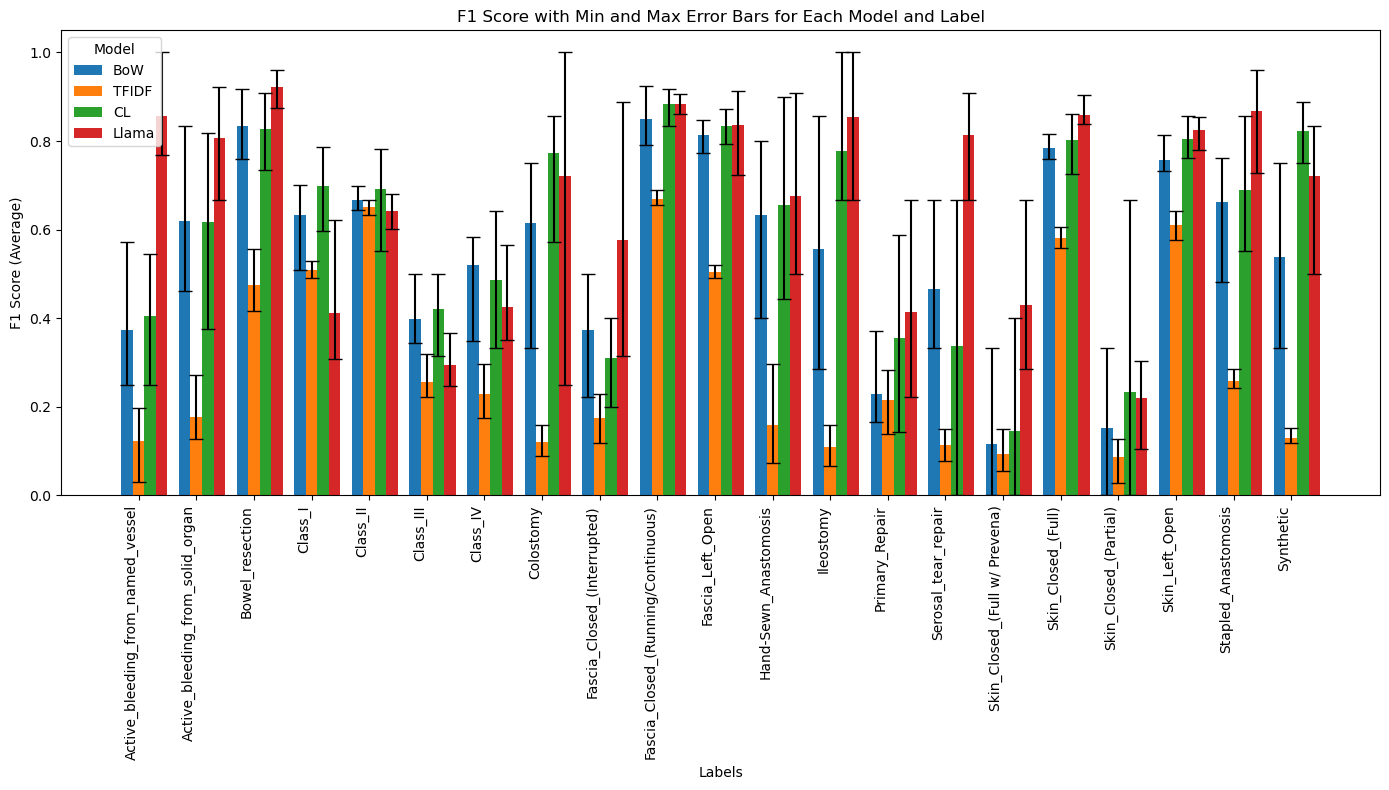

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

f1_histogram_data = pd.read_csv('path/to/f1_histogram_data.csv')

# Grouping data by model for plotting
models = f1_histogram_data['Model'].unique()

# Create a bar plot with error bars for each model and label

# Set figure size
plt.figure(figsize=(14, 8))

# Set width of bars
bar_width = 0.2

# Set the position of bars on X axis
labels = f1_histogram_data['Label'].unique()
label_indices = range(len(labels))

# Loop through models to create grouped bars
for i, model in enumerate(models):
    # Filter data for the current model
    model_data = f1_histogram_data[f1_histogram_data['Model'] == model]
    
    # Adjust position for each model
    positions = [x + i * bar_width for x in label_indices]
    
    # Create bar plot with error bars
    plt.bar(positions, model_data['Average'], 
            width=bar_width, 
            yerr=[model_data['Average'] - model_data['Min'], model_data['Max'] - model_data['Average']],
            label=model, capsize=5)

# Customize plot
plt.title('F1 Score with Min and Max Error Bars for Each Model and Label')
plt.xlabel('Labels')
plt.ylabel('F1 Score (Average)')
plt.xticks([r + bar_width for r in range(len(labels))], labels, rotation=90, ha='right')
plt.legend(title='Model')

# Show the plot
plt.tight_layout()
plt.show()


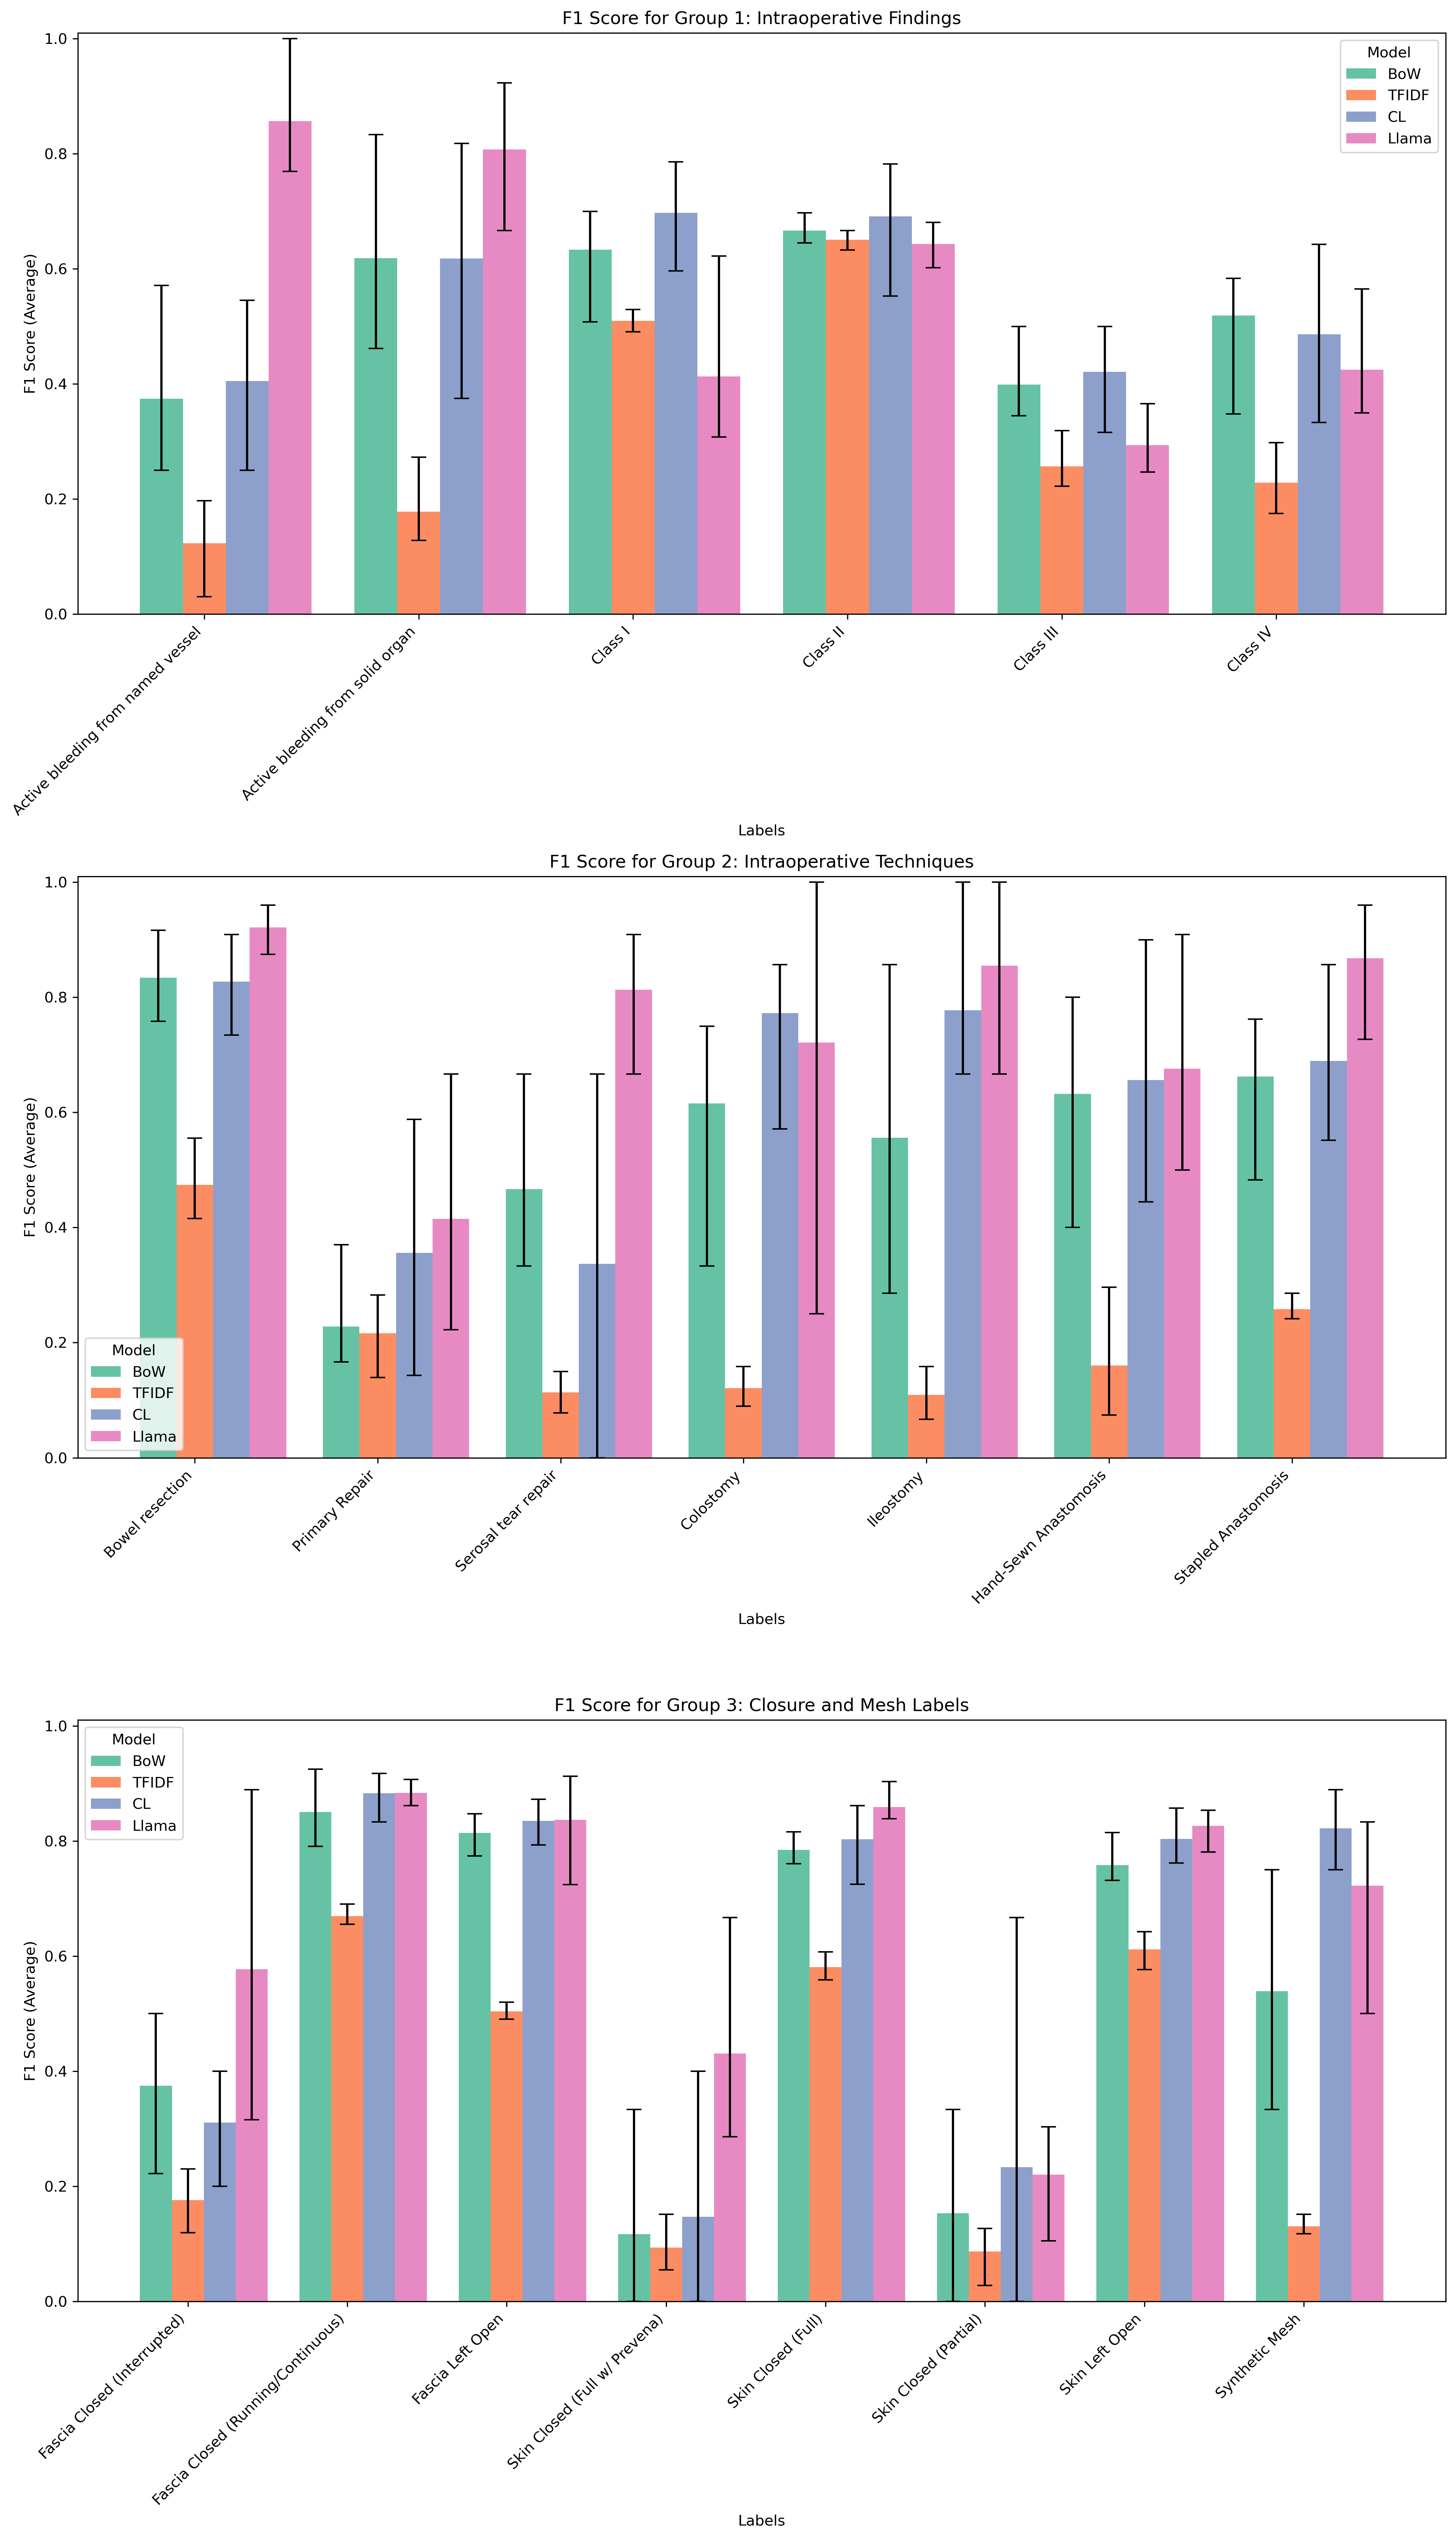

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the mapping for label renaming
label_mapping = {
    'Active_bleeding_from_named_vessel': 'Active bleeding from named vessel',
    'Active_bleeding_from_solid_organ': 'Active bleeding from solid organ',
    'Class_I': 'Class I',
    'Class_II': 'Class II',
    'Class_III': 'Class III',
    'Class_IV': 'Class IV',
    'Bowel_resection': 'Bowel resection',
    'Colostomy': 'Colostomy',
    'Ileostomy': 'Ileostomy',
    'Hand-Sewn_Anastomosis': 'Hand-Sewn Anastomosis',
    'Serosal_tear_repair': 'Serosal tear repair',
    'Primary_Repair': 'Primary Repair',
    'Stapled_Anastomosis': 'Stapled Anastomosis',
    'Fascia_Closed_(Interrupted)': 'Fascia Closed (Interrupted)',
    'Fascia_Closed_(Running/Continuous)': 'Fascia Closed (Running/Continuous)',
    'Fascia_Left_Open': 'Fascia Left Open',
    'Skin_Closed_(Full w/ Prevena)': 'Skin Closed (Full w/ Prevena)',
    'Skin_Closed_(Full)': 'Skin Closed (Full)',
    'Skin_Closed_(Partial)': 'Skin Closed (Partial)',
    'Skin_Left_Open': 'Skin Left Open',
    'Synthetic': 'Synthetic Mesh'
}

# Apply the mapping to the 'Label' column
f1_histogram_data['Label'] = f1_histogram_data['Label'].map(label_mapping)

# Define label groups with new names and desired order
group1_labels = [
    'Active bleeding from named vessel', 
    'Active bleeding from solid organ', 
    'Class I', 'Class II', 'Class III', 'Class IV'
]
group2_labels = [
    'Bowel resection', 'Primary Repair', 'Serosal tear repair', 
    'Colostomy', 'Ileostomy', 'Hand-Sewn Anastomosis', 'Stapled Anastomosis'
]
group3_labels = [
    'Fascia Closed (Interrupted)', 'Fascia Closed (Running/Continuous)', 'Fascia Left Open',
    'Skin Closed (Full w/ Prevena)', 'Skin Closed (Full)', 'Skin Closed (Partial)',
    'Skin Left Open', 'Synthetic Mesh'
]
# Grouping data by model for plotting
models = f1_histogram_data['Model'].unique()

# Set figure size and create subplots
fig, axes = plt.subplots(3, 1, figsize=(14, 24), dpi=300)

# Set width of bars
bar_width = 0.2

# Get the colorblind palette
colors = sns.color_palette("Set2", len(models))

# Function to plot histogram for a given group of labels
def plot_histogram(ax, label_group, title):
    label_indices = range(len(label_group))
    
    for i, model in enumerate(models):
        model_data = f1_histogram_data[
            (f1_histogram_data['Model'] == model) & 
            (f1_histogram_data['Label'].isin(label_group))
        ]
        
        # Ensure the data is sorted according to the label group
        model_data = model_data.set_index('Label').reindex(label_group).reset_index()
        
        positions = [x + i * bar_width for x in label_indices]
        
        # Calculate yerr for the current model and label group
        yerr = [
            model_data['Average'] - model_data['Min'], 
            model_data['Max'] - model_data['Average']
        ]
        
        ax.bar(positions, model_data['Average'], 
               width=bar_width, 
               yerr=yerr,
               label=model, capsize=5, color=colors[i])
    
    ax.set_title(title)
    ax.set_xlabel('Labels')
    ax.set_ylabel('F1 Score (Average)')
    ax.set_xticks([r + bar_width for r in range(len(label_group))])
    ax.set_xticklabels(label_group, rotation=45, ha='right')
    ax.set_ylim(0, 1.01)  # Set y-axis range from 0 to 1
    ax.legend(title='Model')

# Plot each group in a separate subplot
plot_histogram(axes[0], group1_labels, 'F1 Score for Group 1: Intraoperative Findings')
plot_histogram(axes[1], group2_labels, 'F1 Score for Group 2: Intraoperative Techniques')
plot_histogram(axes[2], group3_labels, 'F1 Score for Group 3: Closure and Mesh Labels')

# Adjust layout
plt.tight_layout()
plt.show()

In [23]:
# Save the histogram at high dpi
fig.savefig('path/to/f1_histogram.png', dpi=300)
